# Predicting the Severity of Car Accidents using Predictive Model




### IBM Applied Data Science Capstone Project
#### By: Ahmad Khairi Bin Ahmad Khir

In [3]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
%matplotlib inline

In [4]:
dataurl = 'https://raw.githubusercontent.com/astradrel/Capstone-Project/main/Data-Collisions.csv'
df = pd.read_csv(dataurl)

C:\Users\USER\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df.shape

(194673, 38)

In [5]:
df_accident = df[['JUNCTIONTYPE', 'ROADCOND', 'WEATHER', 'LIGHTCOND', 'SPEEDING','UNDERINFL','OBJECTID','SEVERITYCODE',]]
df_accident.head()

,JUNCTIONTYPE,ROADCOND,WEATHER,LIGHTCOND,SPEEDING,UNDERINFL,OBJECTID,SEVERITYCODE
0,At Intersection (intersection related),Wet,Overcast,Daylight,NaN,N,1,2
1,Mid-Block (not related to intersection),Wet,Raining,Dark - Street Lights On,NaN,0,2,1
2,Mid-Block (not related to intersection),Dry,Overcast,Daylight,NaN,0,3,1
3,Mid-Block (not related to intersection),Dry,Clear,Daylight,NaN,N,4,1
4,At Intersection (intersection related),Wet,Raining,Daylight,NaN,0,5,2


In [6]:
# Cleaning the column JUNCTIONTYPE

df_accident = df_accident[df_accident['JUNCTIONTYPE'].notna()]

df_accident = df_accident[df_accident['JUNCTIONTYPE'] != 'Unknown']

df_accident['JUNCTIONTYPE'].replace({"Mid-Block (not related to intersection)": "Mid-Block", 
                                     "Mid-Block (but intersection related)": "Mid-Block",
                                     "At Intersection (but not related to intersection)": "Intersection",
                                     "At Intersection (intersection related)": "Intersection",
                                    "Driveway Junction" : "Driveway",
                                    "Ramp Junction" : "Ramp"}, inplace=True)

df_accident.groupby(['JUNCTIONTYPE'])['SEVERITYCODE'].value_counts(normalize=True)

JUNCTIONTYPE  SEVERITYCODE
Driveway      1               0.696936
              2               0.303064
Intersection  1               0.571748
              2               0.428252
Mid-Block     1               0.762847
              2               0.237153
Ramp          1               0.674699
              2               0.325301
Name: SEVERITYCODE, dtype: float64

In [7]:
# Cleaning the column ROADCOND

df_accident = df_accident[df_accident['ROADCOND'].notna()]

df_accident = df_accident[df_accident['ROADCOND'] != 'Unknown']
df_accident = df_accident[df_accident['ROADCOND'] != 'Other']

df_accident['ROADCOND'].replace({"Ice": "Wet", 
                                 "Snow/Slush": "Wet", 
                                 "Standing Water": "Wet", 
                                 "Sand/Mud/Dirt" : "Dry",
                                "Oil" : "Wet"}, inplace=True)

df_accident.groupby(['ROADCOND'])['SEVERITYCODE'].value_counts(normalize=True)

ROADCOND  SEVERITYCODE
Dry       1               0.674831
          2               0.325169
Wet       1               0.671428
          2               0.328572
Name: SEVERITYCODE, dtype: float64

In [8]:
# Cleaning the column WEATHER

df_accident = df_accident[df_accident['WEATHER'].notna()]

df_accident['WEATHER'].replace({"Unknown" : "Other",
                                 "Snowing": "Other", 
                                 "Fog/Smog/Smoke": "Other",
                                "Sleet/Hail/Freezing Rain" : "Other",
                                 "Blowing Sand/Dirt" : "Other",
                                "Severe Crosswind" : "Other",
                                "Partly Cloudy" : "Other"}, inplace=True)

df_accident.groupby(['WEATHER'])['SEVERITYCODE'].value_counts(normalize=True)

WEATHER   SEVERITYCODE
Clear     1               0.673215
          2               0.326785
Other     1               0.786728
          2               0.213272
Overcast  1               0.679170
          2               0.320830
Raining   1               0.660492
          2               0.339508
Name: SEVERITYCODE, dtype: float64

In [9]:
# Cleaning the column LIGHTCOND

df_accident = df_accident[df_accident['LIGHTCOND'].notna()]

df_accident['LIGHTCOND'].replace({"Dark - Street Lights On" : "Dark",
                                 "Unknown": "Other", 
                                 "Dark - No Street Lights": "Dark",
                                "Dark - Street Lights Off" : "Dark",
                                 "Dark - Unknown Lighting" : "Dark"}, inplace=True)

df_accident.groupby(['LIGHTCOND'])['SEVERITYCODE'].value_counts(normalize=True)

LIGHTCOND  SEVERITYCODE
Dark       1               0.695855
           2               0.304145
Dawn       1               0.662776
           2               0.337224
Daylight   1               0.659440
           2               0.340560
Dusk       1               0.662513
           2               0.337487
Other      1               0.891227
           2               0.108773
Name: SEVERITYCODE, dtype: float64

In [10]:
# Cleaning the column SPEEDING

df_accident['SPEEDING'].fillna('N', inplace=True)
df_accident['SPEEDING'].replace({"Y" : "Non-Speeding", "N" : "Speeding"}, inplace=True)

df_accident.groupby(['SPEEDING'])['SEVERITYCODE'].value_counts(normalize=True)

SPEEDING      SEVERITYCODE
Non-Speeding  1               0.619006
              2               0.380994
Speeding      1               0.676858
              2               0.323142
Name: SEVERITYCODE, dtype: float64

In [11]:
# Cleaning the column UNDERINFL

df_accident['UNDERINFL'].replace({"0" : "Not Under Influence", "1": "Under Influence"}, inplace=True)
df_accident['UNDERINFL'].replace({"N" : "Not Under Influence", "Y": "Under Influence"}, inplace=True)

df_accident.groupby(['UNDERINFL'])['SEVERITYCODE'].value_counts(normalize=True)

UNDERINFL            SEVERITYCODE
Not Under Influence  1               0.677412
                     2               0.322588
Under Influence      1               0.607968
                     2               0.392032
Name: SEVERITYCODE, dtype: float64

In [12]:
# Resetting the index

df_accident.reset_index(inplace=True)
df_accident = df_accident.drop(['index'], axis=1)
df_accident = df_accident.rename_axis('ID')

In [13]:
# Display the new cleaned dataset

df_accident.head()


,JUNCTIONTYPE,ROADCOND,WEATHER,LIGHTCOND,SPEEDING,UNDERINFL,OBJECTID,SEVERITYCODE
ID,,,,,,,,
0,Intersection,Wet,Overcast,Daylight,Speeding,Not Under Influence,1,2
1,Mid-Block,Wet,Raining,Dark,Speeding,Not Under Influence,2,1
2,Mid-Block,Dry,Overcast,Daylight,Speeding,Not Under Influence,3,1
3,Mid-Block,Dry,Clear,Daylight,Speeding,Not Under Influence,4,1
4,Intersection,Wet,Raining,Daylight,Speeding,Not Under Influence,5,2


In [14]:
# Perform One Hot Encoding to Features Variable

Features = pd.concat([pd.get_dummies(df_accident['JUNCTIONTYPE']),pd.get_dummies(df_accident['ROADCOND']),
                              pd.get_dummies(df_accident['WEATHER']),pd.get_dummies(df_accident['LIGHTCOND']),
                              pd.get_dummies(df_accident['SPEEDING']), pd.get_dummies(df_accident['UNDERINFL'])], axis=1)

Features.head()

,Driveway,Intersection,Mid-Block,Ramp,Dry,Wet,Clear,Other,Overcast,Raining,Dark,Dawn,Daylight,Dusk,Other,Non-Speeding,Speeding,Not Under Influence,Under Influence
ID,,,,,,,,,,,,,,,,,,,
0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0
1,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,1,1,0
2,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,1,1,0
3,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,1,1,0
4,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,1,0


In [15]:
# Assigning Features and Target 

data_x = Features
data_y = df_accident['SEVERITYCODE'].values

In [16]:
# Normalizing the Features data

data_x = preprocessing.StandardScaler().fit(data_x).transform(data_x)
data_x[0:5]


array([[-0.25065638,  1.3307828 , -1.17295332, -0.03018131, -1.57865976,
         1.57865976, -1.31606595, -0.13851747,  2.31882982, -0.48493273,
        -0.63240904, -0.11913895,  0.73188527, -0.18407938, -0.1289581 ,
        -0.23695803,  0.23695803,  0.2348636 , -0.2348636 ],
       [-0.25065638, -0.75143742,  0.85254885, -0.03018131, -1.57865976,
         1.57865976, -1.31606595, -0.13851747, -0.431252  ,  2.0621417 ,
         1.58125506, -0.11913895, -1.36633436, -0.18407938, -0.1289581 ,
        -0.23695803,  0.23695803,  0.2348636 , -0.2348636 ],
       [-0.25065638, -0.75143742,  0.85254885, -0.03018131,  0.63344872,
        -0.63344872, -1.31606595, -0.13851747,  2.31882982, -0.48493273,
        -0.63240904, -0.11913895,  0.73188527, -0.18407938, -0.1289581 ,
        -0.23695803,  0.23695803,  0.2348636 , -0.2348636 ],
       [-0.25065638, -0.75143742,  0.85254885, -0.03018131,  0.63344872,
        -0.63344872,  0.75984034, -0.13851747, -0.431252  , -0.48493273,
        -0.632

In [17]:
# Splitting the data into Train/Test set

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split( data_x, data_y, test_size =0.5)


       
print ('Train set:', X_train.shape,  Y_train.shape)
print ('Test set:', X_test.shape,  Y_test.shape)

Train set: (85706, 19) (85706,)
Test set: (85707, 19) (85707,)


In [18]:
# Initialize Accuracy List 

ListJ = []
ListF1 = []
ListLL = ['NA', 'NA', 'NA']

The mean accuracy for each iteration of K of 10 :
 [0.59043019 0.64014608 0.59566897 0.60168948 0.59762913 0.64578156
 0.64090448 0.64578156 0.62031106 0.62626157]

The best mean accuracy is 0.6457815580991051 with K of 6


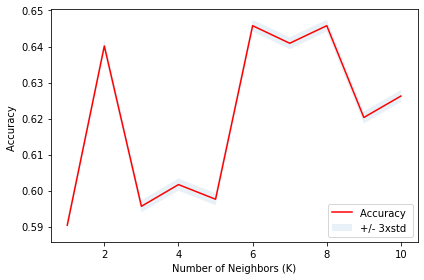

In [41]:
# Modelling using K Nearest Neighbours Model

from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

Ks = 11
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfusionMatrix = [];
for n in range(1,Ks):
    
    KNNModel = KNeighborsClassifier(n_neighbors = n).fit(X_train,Y_train)
    Y_hatKNN=KNNModel.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(Y_test, Y_hatKNN)
    std_acc[n-1]=np.std(Y_hatKNN==Y_test)/np.sqrt(Y_hatKNN.shape[0])

    
print("The mean accuracy for each iteration of K of",Ks-1, ":\n",mean_acc) 
print( "\nThe best mean accuracy is", mean_acc.max(), "with K of", mean_acc.argmax()+1)

plt.plot(range(1,Ks),mean_acc,'r')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [55]:
# Perform Accuracy Evaluation on KNN Model

BestKNNModel = KNeighborsClassifier(n_neighbors = mean_acc.argmax()+1).fit(X_train,Y_train)
y_hatKNN = BestKNNModel.predict(X_test)
KNNJ = jaccard_score(Y_test, y_hatKNN)
KNNF1 = f1_score(Y_test, y_hatKNN, average='weighted')

ListJ.append(round(KNNJ,2))
ListF1.append(round(KNNF1,2))


print("KNN Jaccard index: %.2f" % KNNJ)
print("KNN F1-score: %.2f" % KNNF1)

KNN Jaccard index: 0.63
KNN F1-score: 0.58


In [22]:
# Modelling using Decision Tree

from sklearn.tree import DecisionTreeClassifier

n_max_depth = 15
best_max_depth = 0
lists = [[],[]]

for m in range(3, n_max_depth):
    DTModel = DecisionTreeClassifier(criterion="entropy", max_depth = m)
    DTModel.fit(X_train, Y_train)
    y_hatDT = DTModel.predict(X_test)

    from sklearn import metrics
    import matplotlib.pyplot as plt
    acc = metrics.accuracy_score(Y_test, y_hatDT)
    
    lists[0].append(acc)
    lists[1].append(m)
    if acc== max(lists[0]):
        best_acc = acc
        best_max_depth = m

print("Best accuracy of the Decision Tree is ", best_acc, "with a max depth of", best_max_depth)

Best accuracy of the Decision Tree is  0.6737489353261694 with a max depth of 4


In [20]:
# Perform Accuracy Evaluation on DT Model 

BestDTModel = DecisionTreeClassifier(criterion="entropy", max_depth = best_max_depth).fit(X_train, Y_train)
y_hatDT = BestDTModel.predict(X_test)
DTJ = jaccard_score(Y_test, y_hatDT)
DTF1 = f1_score(Y_test, y_hatDT, average='weighted')

ListJ.append(round(DTJ,2))
ListF1.append(round(DTF1,2))


print("DT Jaccard index: %.2f" % DTJ)
print("DT F1-score: %.2f" % DTF1)

DT Jaccard index: 0.67
DT F1-score: 0.55


In [43]:
# Modelling using SVM Model

from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix
import itertools

SVMModel = svm.SVC().fit(X_train, Y_train)
y_hatSVM = SVMModel.predict(X_test)

In [60]:
# Perform Accuracy Evaluation on SVM Model 

SVMJ = jaccard_score(Y_test, y_hatSVM)
SVMF1 = f1_score(Y_test, y_hatSVM, average='weighted')

ListJ.append(round(SVMJ,2))
ListF1.append(round(SVMF1,2))

print("SVM Jaccard index: %.2f" % SVMJ)
print("SVM F1-score: %.2f" % SVMF1)

SVM Jaccard index: 0.67
SVM F1-score: 0.55


In [57]:
# Modelling using LR Model

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

LRModel = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,Y_train)
y_hatLR = LRModel.predict(X_test)

In [62]:
# Perform Accuracy Evaluation on LR Model 

y_hatLR = LRModel.predict(X_test)
y_hatprobaLR = LRModel.predict_proba(X_test)
LRJ = jaccard_score(Y_test, y_hatLR)
LRF1 = f1_score(Y_test, y_hatLR, average='weighted')
LRLL = log_loss(Y_test, y_hatprobaLR)

ListJ.append(round(LRJ,2))
ListF1.append(round(LRF1,2))
ListLL.append(round(LRLL,2))

print("LR Jaccard index: %.2f" % LRJ)
print("LR F1-score: %.2f" % LRF1 )
print("LR LogLoss: %.2f" % LRLL )


LR Jaccard index: 0.67
LR F1-score: 0.56
LR LogLoss: 0.61


In [64]:
# Tabulate the accuracy of each model

df_accuracy = pd.DataFrame(ListJ, index=['KNN','Decision Tree','SVM','Logistic Regression'])
df_accuracy.columns = ['Jaccard']
df_accuracy.insert(loc=1, column='F1-score', value=ListF1)
df_accuracy.insert(loc=2, column='LogLoss', value=ListLL)
df_accuracy.columns.name = 'Algorithm'
df_accuracy

Algorithm,Jaccard,F1-score,LogLoss
KNN,0.63,0.58,NA
Decision Tree,0.67,0.55,NA
SVM,0.67,0.55,NA
Logistic Regression,0.67,0.56,0.61
